In [40]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)
from matplotlib import style
style.use('dark_background')

In [2]:
import pandas as pd
import pandas_profiling
import matplotlib

In [3]:
arquivo = 'dados_casas.csv'
df = pd.read_csv(arquivo, sep=',', header=0)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Vamos checar se há muitos missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#Como são pouquíssimos missing values, vamos usar o pandas_profiling para ter uma ideia geral do dataframe e depois lidamos com eles
arquivo = 'dados_casas.csv'
df = pd.read_csv(arquivo, sep=',', header=0)

In [7]:
pandas_profiling.ProfileReport(df, minimal=True, dark_mode=True) #minimal para não fazer correlações

Se quisermos um arquivo html com esse relatório:

profile = pandas_profiling.ProfileReport(df, minimal=True, dark_mode=True)\
profile.to_file("report.html")

Podemos perceber que algumas colunas possuem uma grande quantidade de zeros. Por isso, não são interessantes para análise dos dados. Vamos,então, ler o dataframe apenas com as colunas que parecem influenciar de forma significativa no preço do imóvel.

In [8]:
df = pd.read_csv(arquivo, sep=',', header=0,usecols=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','yr_built','waterfront','condition']) #pegando algumas colunas relevantes
df.head() #poderíamos passar uma parâmetro para ler as x primeiras linhas
#tbm temos df.tail(x), que faz o inverso
#tbm temos df.sample(x) para pegar uma amostra aleatória de x dados

#OBS: podemos usar a seguinte função lambda 'lambda column : column not in [colunas indesejadas])' para ler todas as colunas exceto algumas

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3.0,1.00,1180,5650,1.0,0,3,7,1955
1,538000.0,3.0,2.25,2570,7242,2.0,0,3,7,1951
2,180000.0,2.0,1.00,770,10000,1.0,0,3,6,1933
3,604000.0,4.0,3.00,1960,5000,1.0,0,5,7,1965
4,510000.0,3.0,2.00,1680,8080,1.0,0,3,8,1987


In [9]:
df.columns
#Podemos transformar em um lista fazendo df.columns.tolist()

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [10]:
df.count() #faltam valores em bedrooms e floors

price          21613
bedrooms       21609
bathrooms      21613
sqft_living    21613
sqft_lot       21613
floors         21612
waterfront     21613
condition      21613
grade          21613
yr_built       21613
dtype: int64

In [11]:
df.describe() # 33 quartos provavelmente é um outlier, ou um dado incorreto.
#df.shape -> retorna uma tupla (num_linhas, num_cols)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.161300e+04,21609.000000,21613.000000,21613.000000,2.161300e+04,21612.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370910,2.114757,2079.899736,1.510697e+04,1.494332,0.007542,3.409430,7.656873,1971.005136
std,3.671272e+05,0.930084,0.770163,918.440897,4.142051e+04,0.539991,0.086517,0.650743,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [12]:
df.info()
#podemos reduzir bastante o uso de memoria mudando, por exemplo, floors para um float32. Idem para bedrooms e bathrooms.
#Year_buildt, waterfront e grade também podem ser reduzidos para int32. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21609 non-null  float64
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   sqft_lot     21613 non-null  int64  
 5   floors       21612 non-null  float64
 6   waterfront   21613 non-null  int64  
 7   condition    21613 non-null  int64  
 8   grade        21613 non-null  int64  
 9   yr_built     21613 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [14]:
df.bedrooms = df.bedrooms.astype('float32')
df.bathrooms = df.bathrooms.astype('float32')
df.floors = df.floors.astype('float32')
df.grade = df.grade.astype('int32')
df.yr_built = df.yr_built.astype('int32')
df.waterfront = df.waterfront.astype('int32')

In [15]:
df.info() #reduzimos em aproximadamente um terço o uso de memória

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21609 non-null  float32
 2   bathrooms    21613 non-null  float32
 3   sqft_living  21613 non-null  int64  
 4   sqft_lot     21613 non-null  int64  
 5   floors       21612 non-null  float32
 6   waterfront   21613 non-null  int32  
 7   condition    21613 non-null  int64  
 8   grade        21613 non-null  int32  
 9   yr_built     21613 non-null  int32  
dtypes: float32(3), float64(1), int32(3), int64(3)
memory usage: 1.2 MB


In [16]:
#Se a base de dados for muito extensa, podemos separar em chunks

chunk = pd.read_csv(arquivo, chunksize=10000) #teremos 3 chunks: 2 de 10000 e uma de 1613

In [17]:
#Vamos consultar valores únicos de algumas colunas
pd.value_counts(df['bedrooms'])

3.0     9822
4.0     6881
2.0     2759
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

In [18]:
#Vamos localizar esse outlier de 33 quartos
df.loc[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15870,640000.0,33.0,1.75,1620,6000,1.0,0,5,7,1947


Muito provavelmente, o número de quartos era para ser 3. Isso porque, em uma casa de 33 quartos, seria inconveniente apenas 2 banheiros (digamos que sejam dois). Além disso, o espaço total (6000sqft) não parece suficiente para essa quantidade enorme de quartos.

In [19]:
#Vamos ordenar o dataset por preço, a fim de verficar a existência de outliers(e confirmar outros) e observar alguns padrões.
df.sort_values(by='price',ascending=False) #Ordem decrescente

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
7252,7700000.0,6.0,8.00,12050,27600,2.5,0,4,13,1910
3914,7062500.0,5.0,4.50,10040,37325,2.0,1,3,11,1940
9254,6885000.0,6.0,7.75,9890,31374,2.0,0,3,13,2001
4411,5570000.0,5.0,5.75,9200,35069,2.0,0,3,13,2001
1448,5350000.0,5.0,5.00,8000,23985,2.0,0,3,12,2009
...,...,...,...,...,...,...,...,...,...,...
8274,82000.0,3.0,1.00,860,10426,1.0,0,3,6,1954
16198,81000.0,2.0,1.00,730,9975,1.0,0,1,5,1943
465,80000.0,1.0,0.75,430,5050,1.0,0,2,4,1912
15293,78000.0,2.0,1.00,780,16344,1.0,0,1,5,1942


In [20]:
#Vamos investigar, por curiosidade, quantos imóveis receberam a nota máxima(13)
df[df['grade'] == 13].count() #Coincidência interessante, 13 imóveis com nota 13, aproximadamente 0.06% do total

price          13
bedrooms       13
bathrooms      13
sqft_living    13
sqft_lot       13
floors         13
waterfront     13
condition      13
grade          13
yr_built       13
dtype: int64

In [21]:
#Vamos criar uma nova coluna para classificar o imóvel em grande,médio ou pequeno
#A métrica foi arbitrária, apenas para exemplificar
def tamanho(quarto):
    if quarto >= 4:
        return 'Large'
    elif quarto >= 2:
        return 'Medium'
    else:
        return 'Small'

In [22]:
df['category'] = df['bedrooms'].apply(tamanho)
pd.value_counts(df['category'])
#Maioria são imóveis de 2 ou 3 quartos

Medium    12581
Large      8816
Small       216
Name: category, dtype: int64

In [23]:
#Vamos remover essa nova coluna de teste, e aproveitar para remover a linha com beedroom = 33
df.drop(['category'],axis=1,inplace=True) #axis=1 indica que é o eixo y, ou seja, uma coluna
df.drop(df[df.bedrooms == 33].index,inplace=True)

In [24]:
pd.value_counts(df['bedrooms'] == 33) #Sumiu

False    21612
Name: bedrooms, dtype: int64

In [25]:
#Agora já podemos remover todas as linhas com missing values
df.dropna(inplace=True)
df.isnull().sum() #nenhum valor faltante
#se quisermos remover apenas linhas com TODOS os valores faltante, podemos fazer 'df.dropna(how='all', inplace=True)'
#podemos também preencher o valor faltante com a média dos outros, por exemplo.
#Para isso: df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

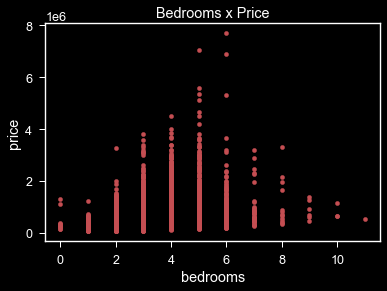

In [26]:
#Vamos visualizar um pouco os dados usando um scatter plot
df.plot(x='bedrooms',y='price',kind='scatter', title='Bedrooms x Price',color='r')

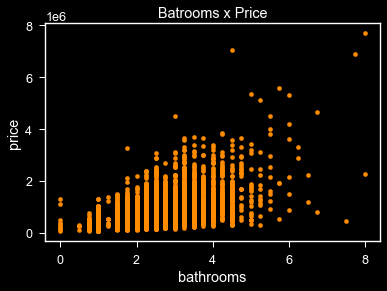

In [27]:
#Agora com o número de banheiros
df.plot(x='bathrooms',y='price',kind='scatter', title='Batrooms x Price',color='darkorange')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027AF486A070>,
      dtype=object)

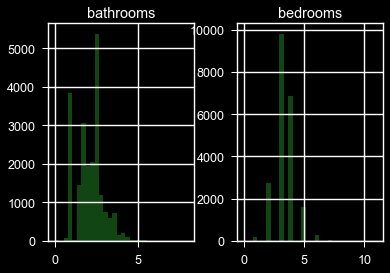

In [28]:
#Agora vamos plotá-los lado a lado em histogramas
df[['bedrooms','bathrooms']].hist(bins=30,alpha=0.5,color='forestgreen')

## Também temos como verificar métricas estatísticas do nosso dataframe

In [29]:
print(df['bedrooms'].mean(),'\n',df['bedrooms'].max(),'\n',df['bedrooms'].std(),'\n',df['bedrooms'].skew())

3.3696024417877197 
 11.0 
 0.9079962968826294 
 0.51847464


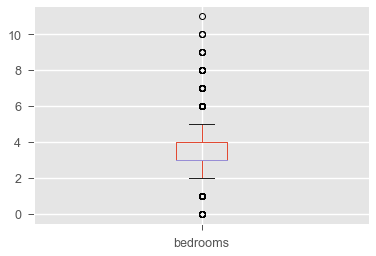

In [30]:
#Vamos plotar agora um boxplot para visualizar melhor ainda alguns outliers
matplotlib.style.use('ggplot')
df.boxplot(column='bedrooms')

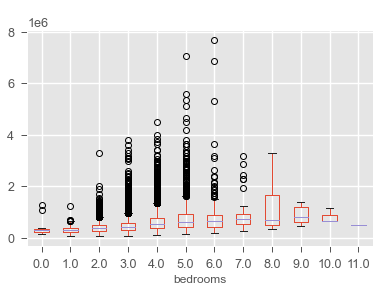

In [31]:
#Vamos relacionar o preço ao número de quartos
df.boxplot(column='price',by='bedrooms')

In [32]:
pd.value_counts(df['bedrooms'],ascending=True)

11.0       1
10.0       3
9.0        6
0.0       13
8.0       13
7.0       38
1.0      199
6.0      272
5.0     1601
2.0     2758
4.0     6881
3.0     9822
Name: bedrooms, dtype: int64

In [33]:
#Vamos analisar algumas correlações entre as colunas
df.corr() #default é a pearson, mas existem outras (e.g. spearman)
#podemos visualizar só algumas colunas, bastar escrever, por ex, df[['price','grade']].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.315420,0.525200,0.702071,0.089633,0.256902,0.266373,0.036321,0.667437,0.054095
bedrooms,0.315420,1.000000,0.529160,0.591453,0.032774,0.181097,-0.006625,0.025606,0.366492,0.159131
bathrooms,0.525200,0.529160,1.000000,0.754640,0.087734,0.500576,0.063742,-0.124928,0.664976,0.505978
sqft_living,0.702071,0.591453,0.754640,1.000000,0.172814,0.353901,0.103815,-0.058667,0.762688,0.318007
sqft_lot,0.089633,0.032774,0.087734,0.172814,1.000000,-0.005192,0.021598,-0.008932,0.113598,0.053097
floors,0.256902,0.181097,0.500576,0.353901,-0.005192,1.000000,0.023701,-0.263723,0.458201,0.489233
waterfront,0.266373,-0.006625,0.063742,0.103815,0.021598,0.023701,1.000000,0.016666,0.082768,-0.026162
condition,0.036321,0.025606,-0.124928,-0.058667,-0.008932,-0.263723,0.016666,1.000000,-0.144653,-0.361343
grade,0.667437,0.366492,0.664976,0.762688,0.113598,0.458201,0.082768,-0.144653,1.000000,0.447006
yr_built,0.054095,0.159131,0.505978,0.318007,0.053097,0.489233,-0.026162,-0.361343,0.447006,1.000000


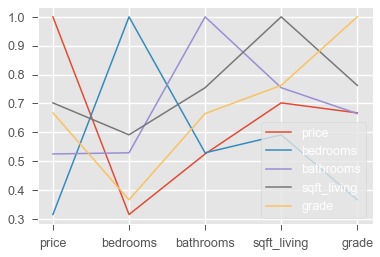

In [34]:
#Fazendo um gráfico com as que possuem maior correlação
df[['price','bedrooms','bathrooms','sqft_living','grade']].corr().plot()

In [38]:
#Podemos usar também uma crosstab

pd.crosstab(df['bedrooms'],df['condition'])

condition,1,2,3,4,5
bedrooms,,,,,
0.0,1,1,10,1,0
1.0,4,11,124,48,12
2.0,12,51,1779,716,200
3.0,8,69,6306,2711,728
4.0,4,36,4579,1682,580
5.0,0,1,1031,418,151
6.0,1,3,158,87,23
7.0,0,0,25,9,4
8.0,0,0,8,3,2


In [36]:
#Vamos melhorar um pouco a visualização das correlações com um estilo

df.corr().style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.315420,0.525200,0.702071,0.089633,0.256902,0.266373,0.036321,0.667437,0.054095
bedrooms,0.315420,1.000000,0.529160,0.591453,0.032774,0.181097,-0.006625,0.025606,0.366492,0.159131
bathrooms,0.525200,0.529160,1.000000,0.754640,0.087734,0.500576,0.063742,-0.124928,0.664976,0.505978
sqft_living,0.702071,0.591453,0.754640,1.000000,0.172814,0.353901,0.103815,-0.058667,0.762688,0.318007
sqft_lot,0.089633,0.032774,0.087734,0.172814,1.000000,-0.005192,0.021598,-0.008932,0.113598,0.053097
floors,0.256902,0.181097,0.500576,0.353901,-0.005192,1.000000,0.023701,-0.263723,0.458201,0.489233
waterfront,0.266373,-0.006625,0.063742,0.103815,0.021598,0.023701,1.000000,0.016666,0.082768,-0.026162
condition,0.036321,0.025606,-0.124928,-0.058667,-0.008932,-0.263723,0.016666,1.000000,-0.144653,-0.361343
grade,0.667437,0.366492,0.664976,0.762688,0.113598,0.458201,0.082768,-0.144653,1.000000,0.447006
yr_built,0.054095,0.159131,0.505978,0.318007,0.053097,0.489233,-0.026162,-0.361343,0.447006,1.000000


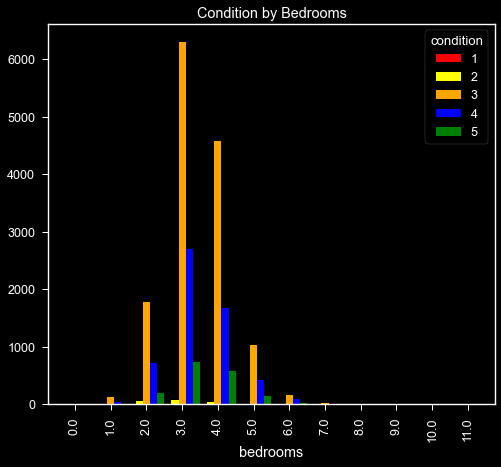

In [41]:
#Vamos plotar um gráfico usando a crosstab
table = pd.crosstab(df['bedrooms'],df['condition'])
table.plot(kind='bar',width=1.0, color=['red','yellow','orange','blue','green'], title='Condition by Bedrooms' ,grid=False)